<a href="https://colab.research.google.com/github/FerdousJUST/Fish-Image-Classification-My-Model/blob/main/SVM_Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.8/dist-packages/tensorflow/python/client/session.py:1768: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [42]:
# Convolutional Neural Network

# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [43]:

tf.__version__

'2.9.2'

In [44]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [6]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/MSc Thesis Work 2022(Ferdous)/Image Dataset/Image_Classification_Dataset/Training',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/MSc Thesis Work 2022(Ferdous)/Image Dataset/Image_Classification_Dataset/Validation',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 4800 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.


In [7]:

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

In [8]:
# Part 2 - Building the CNN
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=16,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))

# Step 5 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## For Binary Classification
#cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01), activation='linear')

## for mulitclassification
cnn.add(Dense(4, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='softmax'))




In [9]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

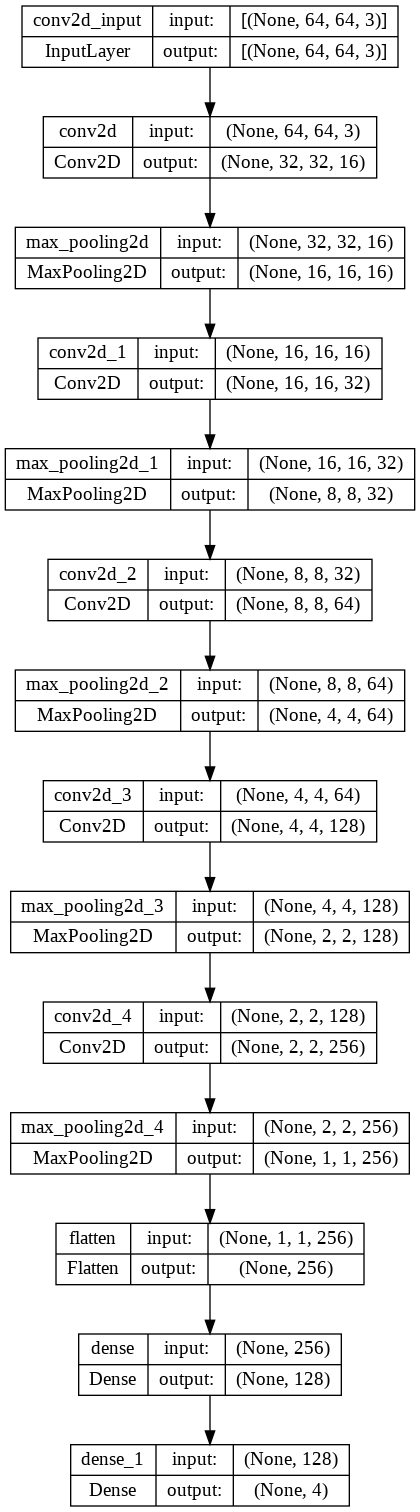

In [10]:
from tensorflow.keras.utils import plot_model
plot_model(model = cnn,show_shapes = True)

In [27]:

# Part 3 - Training the CNN

# Compiling the CNN
#cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])



In [11]:
cnn.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

In [12]:
# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 50)

Epoch 1/50
150/150 [==============================] - 51s 285ms/step - loss: 1.2332 - accuracy: 0.4550 - val_loss: 1.0894 - val_accuracy: 0.6400
Epoch 2/50
150/150 [==============================] - 38s 251ms/step - loss: 1.0524 - accuracy: 0.6942 - val_loss: 1.0196 - val_accuracy: 0.7242
Epoch 3/50
150/150 [==============================] - 38s 253ms/step - loss: 1.0055 - accuracy: 0.7419 - val_loss: 1.0732 - val_accuracy: 0.6542
Epoch 4/50
150/150 [==============================] - 38s 253ms/step - loss: 0.9575 - accuracy: 0.7937 - val_loss: 0.9432 - val_accuracy: 0.8058
Epoch 5/50
150/150 [==============================] - 39s 261ms/step - loss: 0.9224 - accuracy: 0.8329 - val_loss: 0.9408 - val_accuracy: 0.8125
Epoch 6/50
150/150 [==============================] - 38s 254ms/step - loss: 0.8961 - accuracy: 0.8587 - val_loss: 0.9415 - val_accuracy: 0.8133
Epoch 7/50
150/150 [==============================] - 38s 255ms/step - loss: 0.8915 - accuracy: 0.8608 - val_loss: 0.9678 - val_ac

In [13]:

acc = cnn.evaluate(test_set,steps = len(test_set),verbose = 2)
print('%.2f'%(acc[1]*100))

38/38 - 7s - loss: 0.8359 - accuracy: 0.9142 - 7s/epoch - 173ms/step
91.42


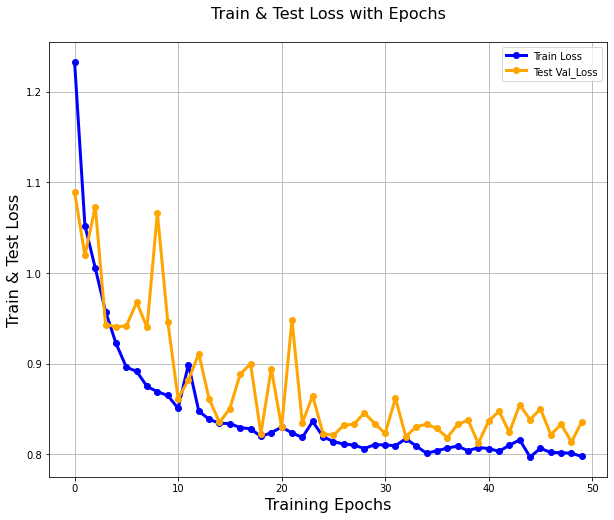

In [14]:
# plot the loss
import matplotlib.pyplot as plt

plt.figure(figsize = (10,8))
plt.plot(r.history['loss'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
plt.plot(r.history['val_loss'],'b-o',color = 'orange',label = 'train',linewidth=3.0)
plt.grid(True)
epochs = range(1,20)
plt.legend(['Train Loss', 'Test Val_Loss'], loc='upper right')
plt.title("Train & Test Loss with Epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 16)
plt.ylabel("Train & Test Loss",fontsize =16)
plt.show()

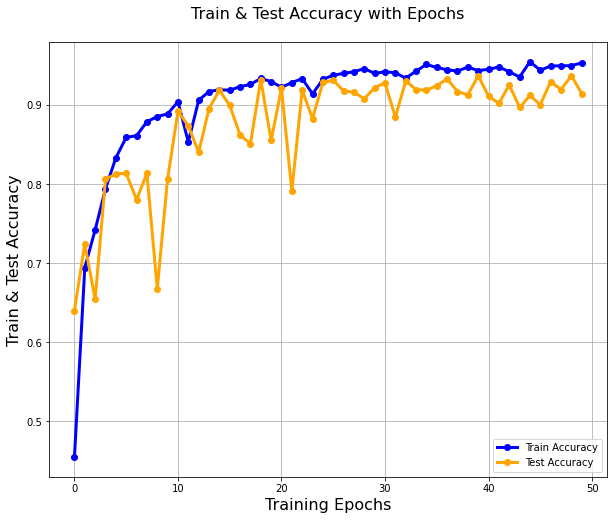

In [15]:
# plot the acquracy
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
plt.plot(r.history['accuracy'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
plt.plot(r.history['val_accuracy'],'b-o',color = 'orange',label = 'train',linewidth=3.0)
plt.grid(True)
epochs = range(1,10)
#plt.legend(['loss', 'val_loss'], loc='upper right')
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='lower right')
plt.title("Train & Test Accuracy with Epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 16)
plt.ylabel("Train & Test Accuracy",fontsize =16)
plt.show()

In [16]:
# save it as a h5 file


from tensorflow.keras.models import load_model

cnn.save('/content/drive/MyDrive/MSc Thesis Work 2022(Ferdous)/My project/part one/my_model01.h5')

In [17]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('/content/drive/MyDrive/MSc Thesis Work 2022(Ferdous)/My project/part one/my_model01.h5')

In [18]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [19]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/MSc Thesis Work 2022(Ferdous)/Image Dataset/Image_Classification_Dataset/Training/Tilapia_Fish/Tilapia_Fish 025.png', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

print(result)

list_index = [0,1,2,3]

x = result

for i in range(4):
  for j in range(4):
    if x[0][list_index[i]] > x[0][list_index[j]]:
          temp = list_index[i]
          list_index[i] = list_index[j]
          list_index[j] = temp

print(list_index)

classification = ['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia_Fish']
     

for i in range(4):
  print(classification[list_index[i]], ':', round(result[0][list_index[i]] * 100,2),'%')






1/1 [==============================] - 0s 242ms/step
[[1.5596299e-05 1.9567833e-05 3.5643741e-05 9.9992919e-01]]
[3, 2, 1, 0]
Tilapia_Fish : 99.99 %
Spotted_Snakehead_Fish : 0.0 %
Hilsha_Fish : 0.0 %
Barbel_Fish : 0.0 %


In [20]:
model.save("/content/drive/MyDrive/MSc Thesis Work 2022(Ferdous)/My project/part one/my_model_svm.h5")

In [21]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score


In [22]:
y_pred = model.predict(test_set)

38/38 [==============================] - 7s 176ms/step


In [23]:
y_pred = np.argmax(y_pred,axis = 1)

In [24]:
y_pred.shape

(1200,)

In [ ]:
#test_set = np.array(test_set)

In [26]:
import os
import cv2

def imagearray(path,size):
  data = []
  for folder in os.listdir(path):
       sub_path = path +"/"+ folder

  for img in os.listdir(sub_path):
      image_path = sub_path + "/"+ img
      img_arr = cv2.imread(image_path)
      img_arr = cv2.resize(img_arr,size)
      data.append(img_arr)

  return data

In [28]:
test_set = '/content/drive/MyDrive/MSc Thesis Work 2022(Ferdous)/Image Dataset/Image_Classification_Dataset/Validation'

In [29]:
size = (64,64)
test = imagearray(test_set,size)

x_test = np.array(test)
x_test = x_test/255

In [30]:
x_test.shape

(300, 64, 64, 3)

In [32]:
def data_class(data_path,size,class_mode):
    datagen  = ImageDataGenerator(rescale=1./255)
    classes = datagen.flow_from_directory(data_path,
                                          target_size = size,
                                          batch_size = 32,
                                          class_mode = class_mode)
    return classes

In [33]:
test_class = data_class(test_set,size,"sparse")

Found 1200 images belonging to 4 classes.


In [34]:
y_test = test_class.classes

In [35]:
y_test.shape

(1200,)

In [36]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.27      0.22      0.24       362
           1       0.27      0.24      0.25       339
           2       0.19      0.24      0.21       239
           3       0.25      0.28      0.26       260

    accuracy                           0.24      1200
   macro avg       0.24      0.25      0.24      1200
weighted avg       0.25      0.24      0.24      1200



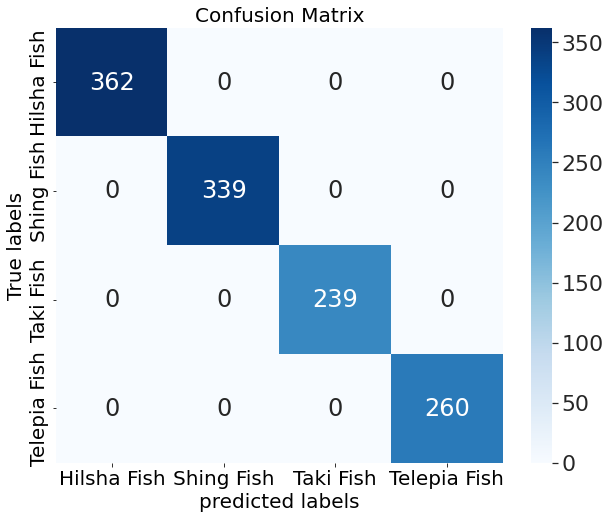

In [37]:
import seaborn as sns
cm = confusion_matrix(y_pred,y_pred)

plt.figure(figsize=(10,8))
ax = plt.subplot()
sns.set(font_scale = 2.0)
sns.heatmap(cm,annot = True,fmt ='g',cmap = "Blues",ax=ax);

#labels,titleand ticks

ax.set_xlabel('predicted labels',fontsize = 20);ax.set_ylabel('True labels',fontsize = 20);
ax.set_title('Confusion Matrix',fontsize = 20);
ax.xaxis.set_ticklabels(['Hilsha Fish','Shing Fish','Taki Fish','Telepia Fish'],
fontsize = 20);ax.yaxis.set_ticklabels(['Hilsha Fish','Shing Fish','Taki Fish','Telepia Fish'],fontsize = 20);

In [38]:
f1_score(y_pred,y_pred,average = 'macro')

1.0

In [39]:
recall_score(y_pred,y_pred,average = 'weighted')

1.0

In [40]:
precision_score(y_pred,y_pred,average = 'macro')

1.0